# Analysis of the Results

In [37]:
import csv
import pandas as pd
import numpy as np

In [38]:
# Load the CSV file
df = pd.read_csv('results/results_over_night.csv')

# Calculate the accuracy
error_diff = {}
error_diff_norm = {}


for inx in ['simple_length','tsp_length','valid_length','AI_prediction']:
    #accuracy[inx] = df['true_length'] / df[inx]
    error_diff[inx] = df['true_length']-df[inx]
    error_diff_norm[inx] = (df['true_length']-df[inx]) / df['true_length']
    


### Analysis by replacing unsuccesful pathfinding with the simple path

Datapoints 511


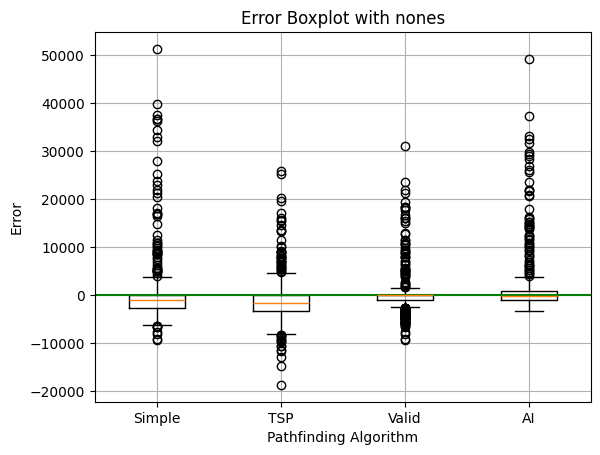

In [39]:
#analysis change nan to simple
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
error_diff_values = []
for key in error_diff:
    error_diff_values.append(list(error_diff[key]))


# replace nones with the values from the simple algorythm simple
for i in range(len(error_diff_values)):
    tmp=[]
    for j in range(len(error_diff_values[i])):
        if np.isnan(error_diff_values[i][j]):
            error_diff_values[i][j] = error_diff_values[0][j]

print("Datapoints",len(error_diff_values[0]))
# Plot the accuracy as a boxplot
plt.boxplot(error_diff_values, labels=['Simple', 'TSP', 'Valid', 'AI'])

#plt.axis([0, 5, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Error')
plt.title('Error Boxplot with nones')

# Show the plot
plt.show()

Datapoints 511


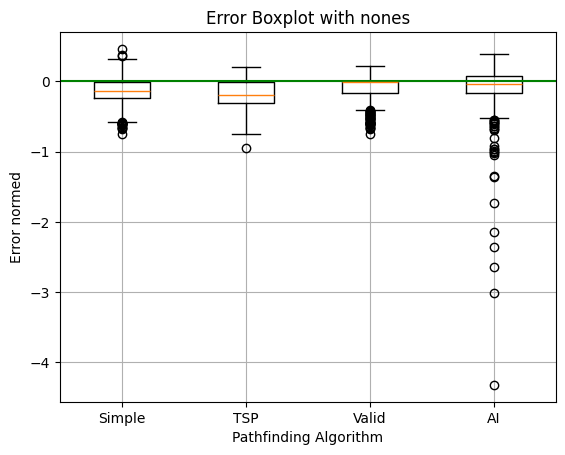

In [40]:
#analysis change nan to simple
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
error_diff_norm_values = []
for key in error_diff_norm:
    error_diff_norm_values.append(list(error_diff_norm[key]))


# replace nones with the values from the simple algorythm simple
for i in range(len(error_diff_norm_values)):
    tmp=[]
    for j in range(len(error_diff_norm_values[i])):
        if np.isnan(error_diff_norm_values[i][j]):
            error_diff_norm_values[i][j] = error_diff_norm_values[0][j]

print("Datapoints",len(error_diff_norm_values[0]))
# Plot the accuracy as a boxplot
plt.boxplot(error_diff_norm_values, labels=['Simple', 'TSP', 'Valid', 'AI'])

#plt.axis([0, 5, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Error normed')
plt.title('Error Boxplot with nones')

# Show the plot
plt.show()

In [41]:
# Calculate the mean square error
mse = []
for i in range(len(error_diff_values)):
    mse.append(0)
    for j in range(len(error_diff_values[i])):
        mse[i] += (error_diff_values[i][j])**2
    mse[i] = np.sqrt(mse[i]/len(error_diff_values[i]))

mse_norm = []
for i in range(len(error_diff_norm_values)):
    mse_norm.append(0)
    for j in range(len(error_diff_norm_values[i])):
        mse_norm[i] += (error_diff_norm_values[i][j])**2
    mse_norm[i] = np.sqrt(mse_norm[i]/len(error_diff_norm_values[i]))


# Print the result
print("Root Mean Square Error:", mse)
print("Root Mean Square Error Normed:", mse_norm)

Root Mean Square Error: [6767.96058891112, 4707.026906350699, 4364.583978193452, 6427.795932584891]
Root Mean Square Error Normed: [0.23611238652323646, 0.2725023480086403, 0.19969786598557057, 0.3921806283303014]


### Analysis by removing pictures where pathfinding was unsuccesful

Datapoints 297


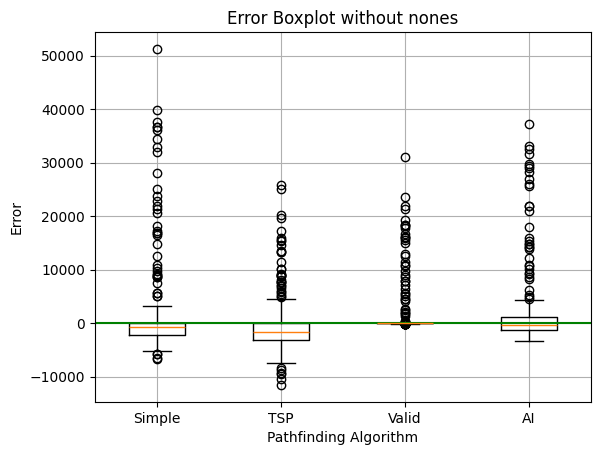

In [42]:
#analysis delete nan values
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
error_diff_values_n = []
for key in error_diff:
    error_diff_values_n.append(list(error_diff[key]))

nones=[]
for i in range(len(error_diff_values_n)): 
    for j in range(len(error_diff_values_n[i])):
        if np.isnan(error_diff_values_n[i][j]):
            nones.append(j)

for i in range(len(error_diff_values_n)):
    error_diff_values_n[i] = [x for j, x in enumerate(error_diff_values_n[i]) if j not in nones]

print("Datapoints",len(error_diff_values_n[0]))
# Plot the accuracy as a boxplot
plt.boxplot(error_diff_values_n, labels=['Simple', 'TSP', 'Valid', 'AI'])

#plt.axis([0, 5, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Error')
plt.title('Error Boxplot without nones')

# Show the plot
plt.show()

Datapoints 297


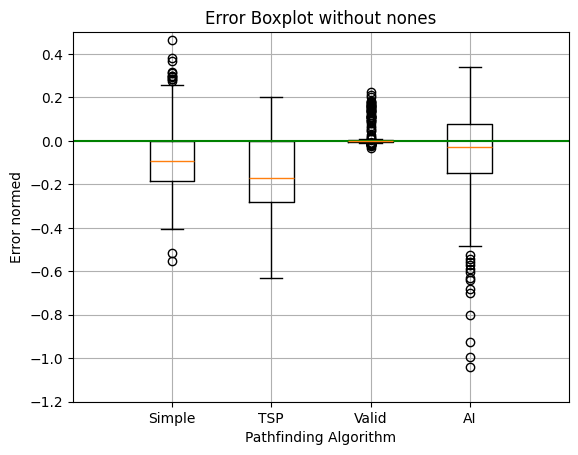

In [43]:
#analysis delete nan values
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
error_diff_norm_values_n = []
for key in error_diff_norm:
    error_diff_norm_values_n.append(list(error_diff_norm[key]))

nones=[]
for i in range(len(error_diff_norm_values_n)): 
    for j in range(len(error_diff_norm_values_n[i])):
        if np.isnan(error_diff_norm_values_n[i][j]):
            nones.append(j)

for i in range(len(error_diff_norm_values_n)):
    error_diff_norm_values_n[i] = [x for j, x in enumerate(error_diff_norm_values_n[i]) if j not in nones]

print("Datapoints",len(error_diff_norm_values_n[0]))
# Plot the accuracy as a boxplot
plt.boxplot(error_diff_norm_values_n, labels=['Simple', 'TSP', 'Valid', 'AI'])

plt.axis([0, 5, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Error normed')
plt.title('Error Boxplot without nones')

# Show the plot
plt.show()

In [44]:
# Calculate the mean square error

mse = []
for i in range(len(error_diff_values_n)):
    mse.append(0)
    for j in range(len(error_diff_values_n[i])):
        mse[i] += (error_diff_values_n[i][j])**2
    mse[i] = np.sqrt(mse[i]/len(error_diff_values_n[i]))

mse_norm = []
for i in range(len(error_diff_norm_values_n)):
    mse_norm.append(0)
    for j in range(len(error_diff_norm_values_n[i])):
        mse_norm[i] += (error_diff_norm_values_n[i][j])**2
    mse_norm[i] = np.sqrt(mse_norm[i]/len(error_diff_norm_values_n[i]))


# Print the result
print("Root Mean Square Error:", mse)
print("Root Mean Square Error Normed:", mse_norm)

Root Mean Square Error: [8343.49082279318, 5175.513271453043, 4855.885710167013, 7035.169871654055]
Root Mean Square Error Normed: [0.17277276284734852, 0.23585634252894697, 0.05045577659202878, 0.4568636153642558]


### Analysis of the lenghts of the paths were pathfinding was succesful

In [45]:
lengths = []

for i in range(len(df['simple_path'])):
    lengths.append(df['simple_path'][i].count('('))

print("Simple path lengths",lengths)
print("Simple path mean",np.mean(lengths))
lengths_not_nan = [x for j, x in enumerate(lengths) if j not in nones]
print("Simple path mean without nan",np.mean(lengths_not_nan))

Simple path lengths [268, 10, 290, 264, 308, 217, 101, 329, 255, 154, 83, 140, 204, 183, 81, 103, 251, 203, 107, 228, 16, 118, 121, 289, 231, 306, 153, 168, 45, 198, 179, 156, 43, 162, 307, 162, 164, 216, 121, 91, 157, 177, 216, 198, 111, 65, 188, 82, 28, 156, 96, 281, 245, 279, 200, 55, 106, 80, 206, 178, 232, 146, 310, 76, 213, 390, 236, 140, 84, 326, 140, 318, 146, 282, 268, 300, 217, 135, 202, 130, 110, 227, 343, 224, 45, 293, 187, 64, 172, 61, 232, 48, 138, 98, 22, 256, 51, 189, 308, 304, 270, 221, 282, 92, 221, 303, 244, 202, 175, 376, 146, 253, 88, 39, 194, 215, 164, 36, 309, 29, 180, 193, 372, 73, 226, 142, 100, 248, 53, 292, 310, 53, 189, 200, 252, 39, 95, 355, 313, 148, 222, 62, 194, 393, 114, 300, 14, 252, 69, 78, 238, 104, 12, 191, 162, 171, 72, 105, 41, 251, 190, 104, 341, 138, 50, 66, 267, 166, 355, 111, 255, 269, 249, 277, 183, 238, 27, 64, 63, 68, 99, 5, 178, 280, 41, 165, 151, 145, 148, 268, 73, 125, 162, 219, 316, 164, 199, 344, 367, 50, 107, 218, 156, 292, 138, 117, 

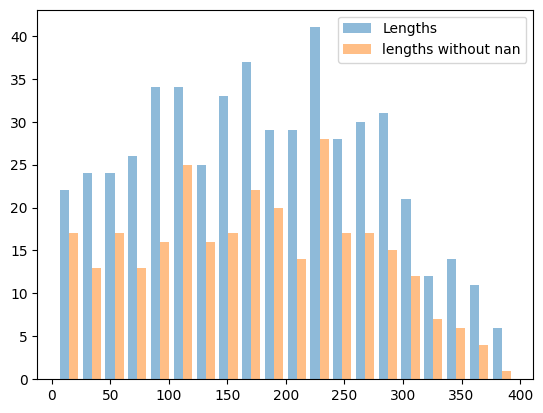

In [46]:
plt.hist((lengths,lengths_not_nan), bins=20, alpha=0.5, label=('Lengths','lengths without nan'))
plt.legend(loc='upper right')

### Analysis of the time taken

In [47]:
times = {}
for inx in ['simple_time','tsp_time','valid_time']:
    #accuracy[inx] = df['true_length'] / df[inx]
    times[inx] = df[inx]+df['matrix_calc_time']
times['AI_time'] = df['AI_time']

Datapoints 511


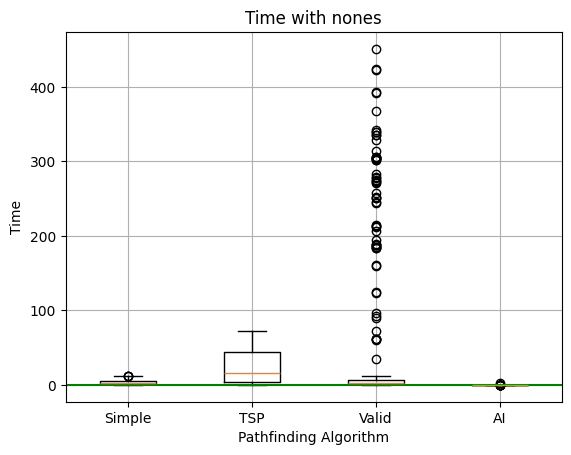

In [48]:
#analysis change nan to simple
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
times_values = []
for key in times:
    times_values.append(list(times[key]))

print("Datapoints",len(times_values[0]))
# Plot the accuracy as a boxplot
plt.boxplot(times_values, labels=['Simple', 'TSP', 'Valid', 'AI'])

#plt.axis([0, 5, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Time')
plt.title('Time with nones')

# Show the plot
plt.show()

Datapoints 297


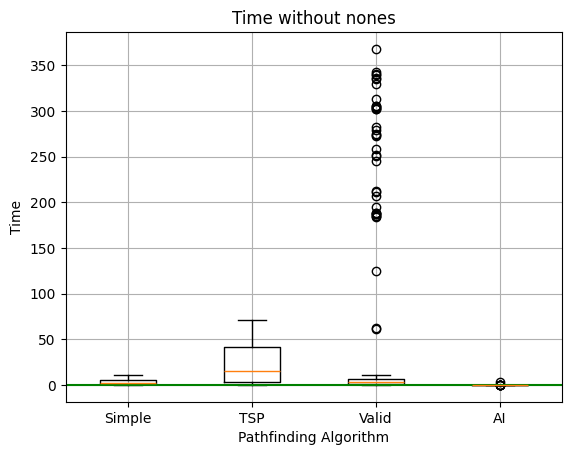

In [49]:
#analysis change nan to simple
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
times_values_n = []
for key in times:
    times_values_n.append(list(times[key]))

    
for i in range(len(times_values_n)):
    times_values_n[i] = [x for j, x in enumerate(times_values_n[i]) if j not in nones]



print("Datapoints",len(times_values_n[0]))
# Plot the accuracy as a boxplot
plt.boxplot(times_values_n, labels=['Simple', 'TSP', 'Valid', 'AI'])

#plt.axis([0, 5, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Time')
plt.title('Time without nones')

# Show the plot
plt.show()

Datapoints 214


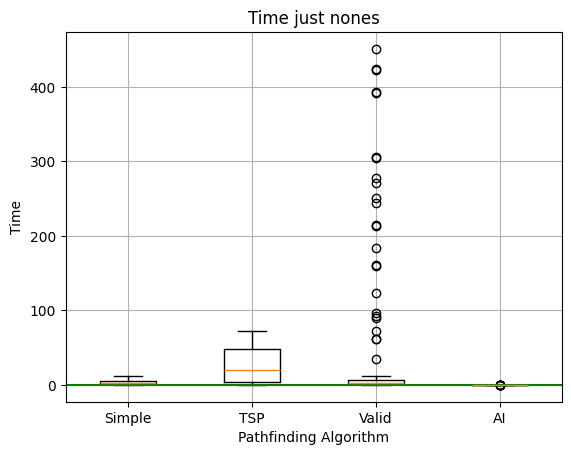

In [50]:
#analysis change nan to simple
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
times_values_j_n = []
for key in times:
    times_values_j_n.append(list(times[key]))

    
for i in range(len(times_values_j_n)):
    times_values_j_n[i] = [x for j, x in enumerate(times_values_j_n[i]) if j in nones]



print("Datapoints",len(times_values_j_n[0]))
# Plot the accuracy as a boxplot
plt.boxplot(times_values_j_n, labels=['Simple', 'TSP', 'Valid', 'AI'])

#plt.axis([0, 5, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Time')
plt.title('Time just nones')

# Show the plot
plt.show()

In [51]:
print("Time with nones      ",np.mean(times_values,axis=1))
print("Time without nones   ",np.mean(times_values_n,axis=1))
print("Time just nones      ",np.mean(times_values_j_n,axis=1))

Time with nones       [ 3.38553769 25.35760907 31.39737289  0.18843416]
Time without nones    [ 3.16820421 23.75143456 33.87558677  0.19017407]
Time just nones       [ 3.68716407 27.58673911 27.9579826   0.18601941]
